# STQD6324: Assignment 1
## Nurul Syafiqah binti Hasbullah Hafidz (P146224)

### INTRODUCTION

I have chosen the retail industry as the sector that I aspire to join upon completing my Master of Science (Data Science and Analytics) program.

The dataset used for this analysis is sourced from Tableau Public Data Sets [https://public.tableau.com/app/learn/sample-data]. It contains detailed information on sales transactions of a retail company in United States that offers a wide range of products across three main categories which are Furniture, Office Supplies, and Technology. The dataset includes key metrics such as sales, profit, quantity and discount that provide valuable insights into the company’s operations and performance.

### PROBLEM STATEMENT

This dataset can be leveraged to:

1) Perform sales performance analysis
2) Gain insights into customer behavior 
3) Support supply chain optimization
4) Track profitability

The insights derived from this analysis can play a crucial role in guiding data-driven decision-making that enables continuous business improvement and effective strategic planning.

### A) DATA CLEANING

In [312]:
#Install impala module
!pip install impyla

#### Import data from Apache Hive to Jupyter

In [315]:
#Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns

In [317]:
#Import packages
from impala.dbapi import connect
import warnings

warnings.filterwarnings("ignore")

conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='default',
    auth_mechanism='PLAIN'
)
cursor = conn.cursor()
cursor.execute('SHOW TABLES')  #show all tables available in default 
print(cursor.fetchall())

[('avgratings',), ('employees',), ('movies',), ('movies_names',), ('names',), ('ratings',), ('superstore',), ('superstoresales',), ('topmovieids',)]


In [319]:
import pandas as pd #use pandas package to read the databese

query = 'SELECT * FROM superstore' #SQL query to read the data in hive
superstore = pd.read_sql(query, conn)
superstore.head() #Display the first 5 rows from the dataframe

,superstore.rowid,superstore.orderid,superstore.orderdate,superstore.shipdate,superstore.shipmode,superstore.customerid,superstore.customername,superstore.segment,superstore.country,superstore.city,...,superstore.postalcode,superstore.region,superstore.productid,superstore.category,superstore.subcategory,superstore.productname,superstore.sales,superstore.quantity,superstore.discount,superstore.profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [321]:
#Drop Row ID column since the column is irrelevance
superstore.drop(columns=['superstore.rowid'], inplace=True)
superstore.head()

,superstore.orderid,superstore.orderdate,superstore.shipdate,superstore.shipmode,superstore.customerid,superstore.customername,superstore.segment,superstore.country,superstore.city,superstore.state,superstore.postalcode,superstore.region,superstore.productid,superstore.category,superstore.subcategory,superstore.productname,superstore.sales,superstore.quantity,superstore.discount,superstore.profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [323]:
#The info about dataset
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   superstore.orderid       9994 non-null   object 
 1   superstore.orderdate     9994 non-null   object 
 2   superstore.shipdate      9994 non-null   object 
 3   superstore.shipmode      9994 non-null   object 
 4   superstore.customerid    9994 non-null   object 
 5   superstore.customername  9994 non-null   object 
 6   superstore.segment       9994 non-null   object 
 7   superstore.country       9994 non-null   object 
 8   superstore.city          9994 non-null   object 
 9   superstore.state         9994 non-null   object 
 10  superstore.postalcode    9994 non-null   int64  
 11  superstore.region        9994 non-null   object 
 12  superstore.productid     9994 non-null   object 
 13  superstore.category      9994 non-null   object 
 14  superstore.subcategory  

In [325]:
#checking for missing value
superstore.isnull().sum()

superstore.orderid         0
superstore.orderdate       0
superstore.shipdate        0
superstore.shipmode        0
superstore.customerid      0
superstore.customername    0
superstore.segment         0
superstore.country         0
superstore.city            0
superstore.state           0
superstore.postalcode      0
superstore.region          0
superstore.productid       0
superstore.category        0
superstore.subcategory     0
superstore.productname     0
superstore.sales           0
superstore.quantity        0
superstore.discount        0
superstore.profit          0
dtype: int64

In [327]:
#checking the data types
superstore.dtypes

superstore.orderid          object
superstore.orderdate        object
superstore.shipdate         object
superstore.shipmode         object
superstore.customerid       object
superstore.customername     object
superstore.segment          object
superstore.country          object
superstore.city             object
superstore.state            object
superstore.postalcode        int64
superstore.region           object
superstore.productid        object
superstore.category         object
superstore.subcategory      object
superstore.productname      object
superstore.sales           float64
superstore.quantity          int64
superstore.discount        float64
superstore.profit          float64
dtype: object

In [329]:
#Convert dates data type of Order Date and Ship Date
superstore['superstore.orderdate'] = pd.to_datetime(superstore['superstore.orderdate'], format='%m/%d/%Y', errors='coerce')
superstore['superstore.shipdate'] = pd.to_datetime(superstore['superstore.shipdate'], format='%m/%d/%Y', errors='coerce')
superstore.head()

,superstore.orderid,superstore.orderdate,superstore.shipdate,superstore.shipmode,superstore.customerid,superstore.customername,superstore.segment,superstore.country,superstore.city,superstore.state,superstore.postalcode,superstore.region,superstore.productid,superstore.category,superstore.subcategory,superstore.productname,superstore.sales,superstore.quantity,superstore.discount,superstore.profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [331]:
#checking the data types (The Order Date and Shipping Date to datetime)
superstore.dtypes

superstore.orderid                 object
superstore.orderdate       datetime64[ns]
superstore.shipdate        datetime64[ns]
superstore.shipmode                object
superstore.customerid              object
superstore.customername            object
superstore.segment                 object
superstore.country                 object
superstore.city                    object
superstore.state                   object
superstore.postalcode               int64
superstore.region                  object
superstore.productid               object
superstore.category                object
superstore.subcategory             object
superstore.productname             object
superstore.sales                  float64
superstore.quantity                 int64
superstore.discount               float64
superstore.profit                 float64
dtype: object

In [333]:
#Calculate shipping duration
superstore['superstore.shippingdays'] = (superstore['superstore.shipdate'] - superstore['superstore.orderdate']).dt.days
superstore.head()

,superstore.orderid,superstore.orderdate,superstore.shipdate,superstore.shipmode,superstore.customerid,superstore.customername,superstore.segment,superstore.country,superstore.city,superstore.state,...,superstore.region,superstore.productid,superstore.category,superstore.subcategory,superstore.productname,superstore.sales,superstore.quantity,superstore.discount,superstore.profit,superstore.shippingdays
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


### B) DATA VISUALIZATIONS

#### 1. Top 10 Best-Selling Products

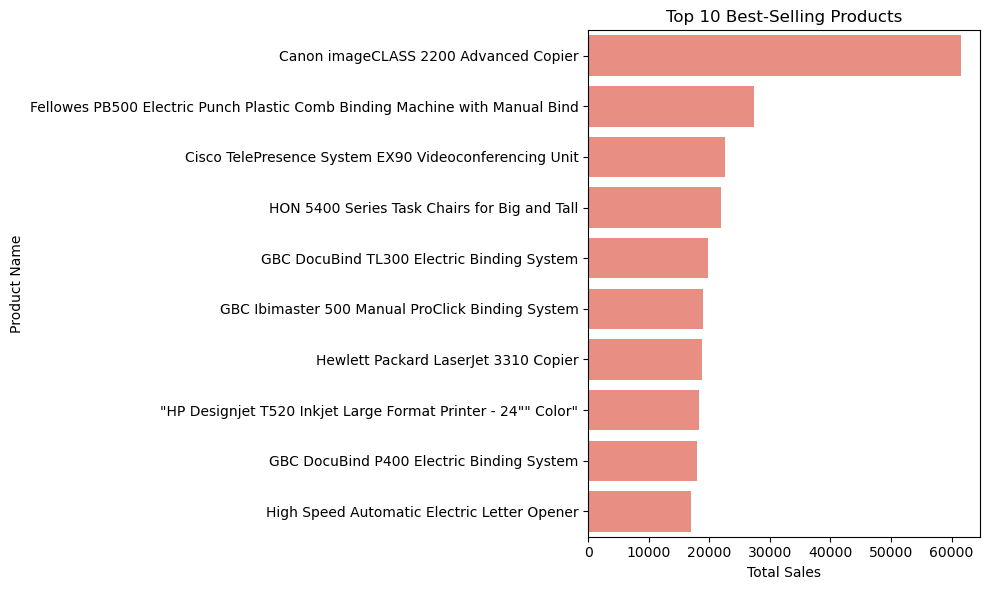

In [337]:
#The top 10 products by sales
top_products = superstore.groupby('superstore.productname')['superstore.sales'].sum().nlargest(10).reset_index()

#Set the figure size
plt.figure(figsize=(10, 6))  # Width=10, Height=6

#Horizontal bar chart
sns.barplot(data=top_products, y='superstore.productname', x='superstore.sales', color='salmon')

#Title and lable of the chart
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout() 
plt.show()

The horizontal bar chart above illustrates the top 10 best-selling products in the superstore. This bar chart shows that the highest top selling products was Canon imageCLASS 2200 Advanced Copier with total annual sales reaching approximately $60000, followed by fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind, Cisco TelePresence System EX90 Videoconferencing Unit, HON 5400 Series Task Chairs for Big and Tall, GBC DociBind TL300 Electric Binding System, Hewlett Packard Laserjet 3310 Copier, HP Designjet T520 Inkjet Large Format Printer - 24 Color, GBC DocuBind P400 Electric Binding System and High Speed Automatic Electric Letter Opener.

This data indicates that the Canon imageCLASS 2200 Advanced Copier is a high-demand product that suggest its as a key driver of revenue in the superstore. The retailer should ensure consistent inventory availability, negotiating supplier discounts for bulk purchasing and explore bundling it with complementary products or service plans to enhance the customer value.

Moreover, understanding which products perform best enables the business to refine its product selection, optimize pricing strategies and target marketing efforts toward the customer segments that are most likely to purchase high-margin and high-volume items. These insights can significantly boost overall profitability and strengthen competitive positioning in the market.

#### 2. Profit Margin by Category

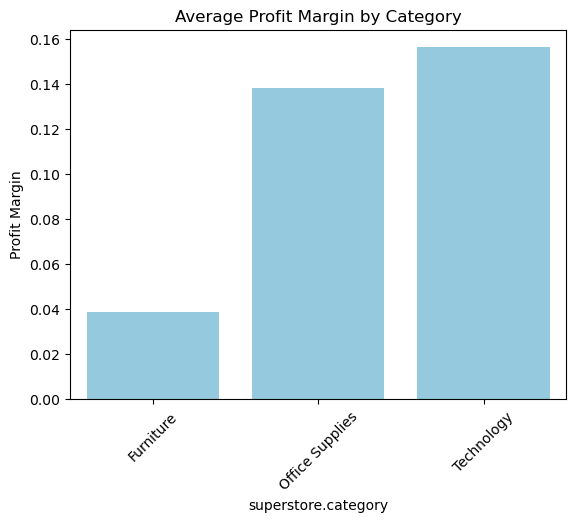

In [341]:
#Calculate the profit margin for each row
superstore['profit_margin'] = superstore['superstore.profit'] / superstore['superstore.sales']

#Group by category and calculate average profit margin
category_profit = superstore.groupby('superstore.category')['profit_margin'].mean().reset_index()

#Vertical bar plot
sns.barplot(data=category_profit, x='superstore.category', y='profit_margin', color='skyblue')

#Title and lable of the chart
plt.title('Average Profit Margin by Category')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.show()

Profit margin is a critical financial metric that reflects a company's ability to generate profit relative to its revenue (Segal, 2025). It serves as an indicator of business efficiency, pricing strategy and overall financial health. In the retail industry, profit margin is especially important as it directly impacts business sustainability and competitiveness.

From the bar chart above, we can observe the average profit margin of the Superstore across three main product categories which are Furniture, Office Supplies and Technology. Among these, the Technology category delivers the highest profit margin and followed by Office Supplies. In contrast, the Furniture category contributes the lowest profit margin to the business.

This analysis offers valuable insight for strategic decision-making among the retailers. The business could focus more on high-margin categories like Technology expanding product offerings, investing in targeted marketing and optimizing inventory to improve overall financial performance. At the same time, it may consider reviewing cost structures or pricing strategies in lower-margin areas like Furniture to identify opportunities for margin improvement. Aligning resource allocation with profit-driving categories can significantly enhance long-term profitability and operational efficiency.

#### 3. Total sales by region

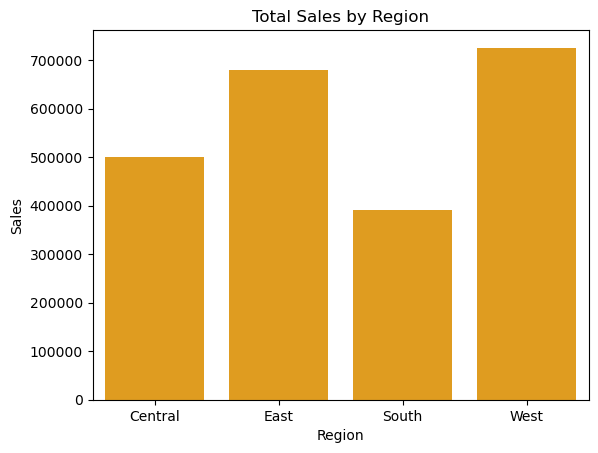

In [345]:
#Count the total sales by region
region_sales = superstore.groupby('superstore.region')['superstore.sales'].sum().reset_index()

#Vertical Bar chart
sns.barplot(data=region_sales, x='superstore.region', y='superstore.sales', color='orange')

#Title and lable of the chart
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.show()

The dataset includes four regions which are Central, East, South and West. The vertical bar chart above illustrates the total sales recorded in each region. According to the results, the West region achieved the highest total sales which exceeding $700000 over the year. This is followed by the East region, with the Central region in third place and the South region recording the lowest total sales.

This analysis provides valuable insights for retailers that helps them to understand regional customer behavior better. In particular, further investigation into the South region's lower performance could uncover opportunities to enhance sales through targeted marketing, product offerings or service improvements. Hence, the Superstore can expand its customer reach and strengthen overall business performance across the country by reinforcing high-performing regions and strategically developing underperforming ones. 


#### 4. Monthly Sales Trend

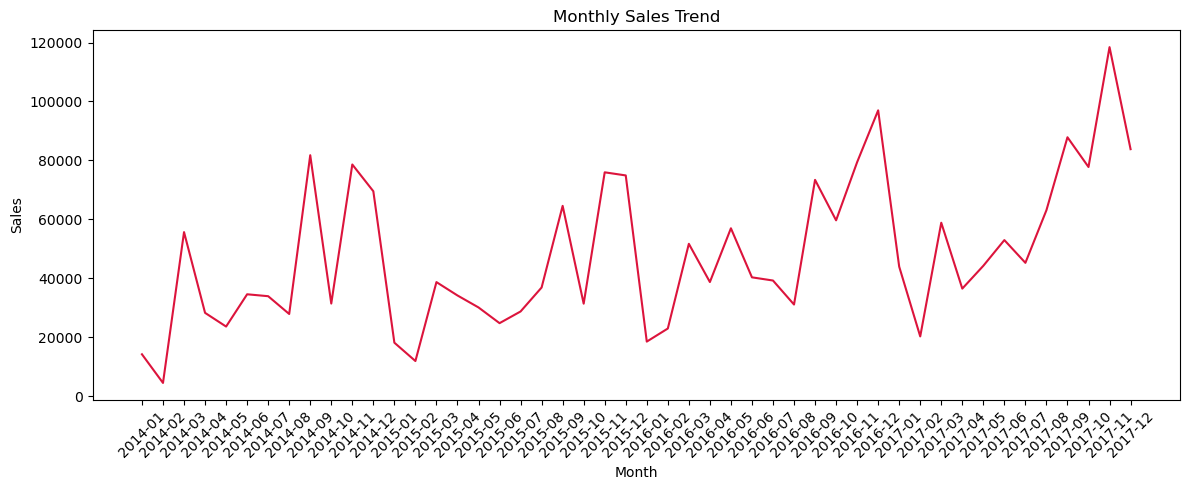

In [349]:
#Convert order date to datetime (Month)
superstore['order_month'] = pd.to_datetime(superstore['superstore.orderdate']).dt.to_period('M').astype(str)

#Group by month and sum sales
monthly_sales = superstore.groupby('order_month')['superstore.sales'].sum().reset_index()

#Line plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='order_month', y='superstore.sales', color='crimson')

#Title and lable of the chart
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

The line chart above illustrates the monthly sales performance from January 2014 to December 2017. The data reveals a consistent upward trend in sales over the four-year period. Notably, January 2014 recorded the lowest sales, while the highest sales were achieved in November 2017 which indicates a significant improvement in the Superstore’s overall business performance.

This positive trend highlights growing customer engagement and effective sales strategies. The monthly sales analysis provides valuable insights into seasonal demand patterns and enables the company to better align their operations, inventory management and marketing efforts. The Superstore can ensure more consistent sales performance, reduce missed opportunities and support long-term profitability and growth By leveraging these insights.

#### 5. Shipping Days by Ship Mode

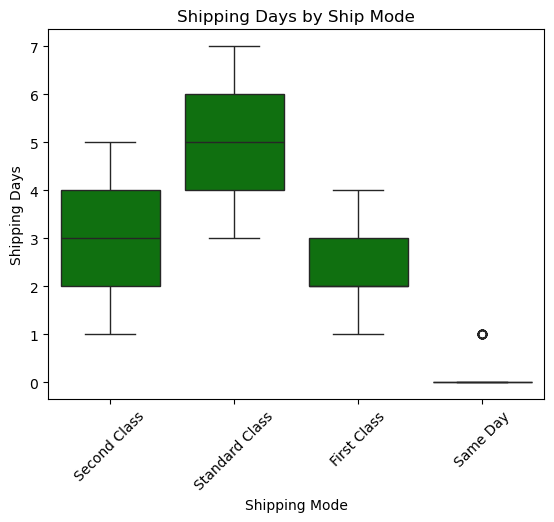

In [352]:
#Create box plot to visualize spread of shipping days by mode
sns.boxplot(data=superstore, x='superstore.shipmode', y='superstore.shippingdays', color='green')

#Title and lable of the chart
plt.title('Shipping Days by Ship Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Shipping Days')
plt.xticks(rotation=45)
plt.show()

The Superstore dataset includes four shipping modes which are First Class, Second Class, Standard Class and Same Day. A box plot analysis was used to compare the delivery times across these shipping options based on the number of days between the order date and the ship date. The result shows that Standard Class generally takes longest shipping time, typically taking between 4 to 7 days. This mode is the most widely used and budget-friendly option. However, the longer delivery window could affect customer satisfaction if expectations aren't clearly communicated. In contrast, Second Class and First Class shipping modes offer faster delivery, usually within 2 to 4 days. This mode strikes a good balance between cost and speed-ideal for time-sensitive but non-urgent orders. Lastly, Same Day shipping provides the fastest delivery, typically within 0 to 1 day. This mode is likely reserved for high-priority or urgent orders.

This analysis underscores the trade-offs among delivery speed, shipping costs and customer expectations. Superstore should consider implementing a dynamic shipping recommendation system to improve logistics efficiency and customer satisfaction. Research identified that positive experiences such as fast delivery enable to translate into positive reviews and higher star ratings that highlights critical role of delivery speed in enhancing customer satisfaction (Vakulenko et al., 2024). This system could suggest the optimal shipping mode at checkout based on the customer's location, order urgency and product type. Integrating real-time delivery time estimates and transparent communication of expected delivery windows can also enhance trust and reduce dissatisfaction due to unmet expectations.

#### 6. Sales by Segment

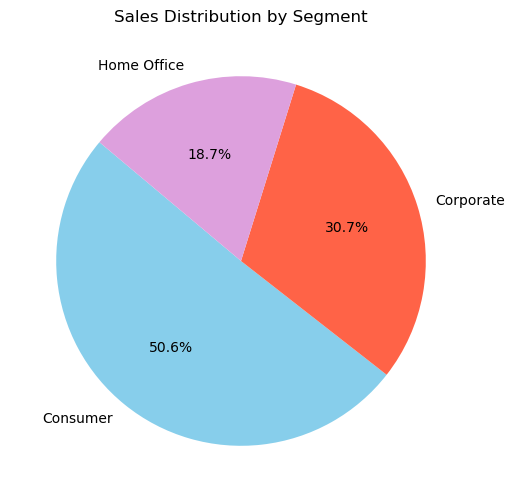

In [356]:
#Aggregate sales by segment
segment_sales = superstore.groupby('superstore.segment')['superstore.sales'].sum()

#Define custom colors
custom_colors = ['skyblue', 'tomato', 'plum']

#Pie chart
plt.figure(figsize=(6,6))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)

#Title and lable of the chart
plt.title('Sales Distribution by Segment')
plt.show()


The pie chart above shows the sales distribution by segment which are Consumer, Corporate and Home Office. The Consumer segment generates the highest total sales with 50.6% across the dataset. This indicates that individual buyers or households are the Superstore's most active customer base. This results likely due to the broad appeal and accessibility of the product range in the superstore. The Corporate segment ranks second in total sales with 30.7%. Although slightly behind Consumers in volume, Corporate customers often place larger and more consistent orders especially for office furniture, supplies and technology. This segment offers strong potential for long-term partnerships and recurring revenue. The Home Office segment contributes the least to total sales. However, this segment may help to represent a growing market. Tailored marketing, bundled offers, or loyalty programs could help boost engagement and sales here.

This analysis helps the business to identify their primary target market and tailor strategies to maximize customer satisfaction and sales value. Given that the majority of sales come from the Consumer segment, the business could focus their promotional efforts on individual items rather than bulk purchases. This approach may appeal more to individual shoppers and households. Additionally, targeted marketing campaigns, seasonal discounts and personalized recommendations could further boost engagement. The business can strengthen customer loyalty and drive consistent growth by aligning product offerings and promotions with consumer buying behavior.

### C) RECOMMENDATIONS

From the analysis generated above, there are a few recommendations that can be used by the business in order to enhance their overall profitability and operational efficiency. It is recommended that the business to revises their discounting strategy by limiting high discounts products which have shown a tendency to result in negative profit margins. Targeting customer segments with a high likelihood of repeat purchases or larger order sizes can be supported by data-driven promotional campaigns.

In addition, the company should conduct a thorough review of its product portfolio by identifying items or subcategories that consistently generate losses especially within the Furniture category. The business can make altenertive by doing reprice, repackage or discontinue these products. Emphasis should be placed on promoting products with stable demand and high profit margins such as those in the Office Supplies category.

Besides that, Shipping efficiency is another area where improvement can drive better customer satisfaction and cost control. It is recommended that the business to analyzes shipping performance by delivery mode and works closely with logistics partners to reduce shipping times and variability. This will encourage customers to choose more reliable shipping options that are potentially through incentives or clearer delivery expectations.

Lastly, developing a more refined customer segmentation strategy will enable the business to tailor marketing efforts and offerings. By identifying the most profitable customer segments and understanding their purchasing behaviors, the company can design targeted loyalty programs and customized service options to increase retention and lifetime value.

These strategic adjustments will position the business to operate more efficiently, maximize profits and better serve their customer base in an increasingly competitive retail environment.


### D) CONCLUSION

The Superstore data analysis reveals opportunities for improving profit margins through smarter discounting, product optimization and efficient shipping practices. The alignment of operations and marketing strategy with data-driven insights can significantly enhance profitability and customer experience. Further data exploration, especially over time and across regions will strengthen strategic planning and help the business remain competitive in a dynamic market environment.

### REFERENCE

1. Segal, T. (2025, May 17). Profit Margin: Definition, types, uses in business and investing. Investopedia. https://www.investopedia.com/terms/p/profitmargin.asp
2. Vakulenko, Y., Figueirinhas, D., Hellström, D., & Pålsson, H. (2024). The impact of order fulfillment on consumer experience: text mining consumer reviews from Amazon US. International Journal of Physical Distribution & Logistics Management, 54(6), 558–585. https://doi.org/10.1108/ijpdlm-11-2023-043